## GRADIENT DESCENT (GRADYAN İNİŞİ)

`Gradient Descent` yöntemi, birbirinden farklı problemler için optimum sonucu bulabilme yeteneğine sahip bir **eniyileme/optimizasyon** algoritmasıdır. Gradient Descent yöntemindeki anafikir, *parametreleri her iterasyonda tekrar revize ederek/ayarlayarak maliyet fonksiyonunu en aza indirmektir.*

Bununla birlite Gradient Descent yöntemi, neredeysa bütün Machine Learning algoritmaları için kullanılır ve bu algoritmaların çalışma mantığını içselleştirmek bakımından oldukça mühimdir.

***

### DATA OLUŞTURALIM

* Gradient Descent yöntemini incelemek üzere kendi örnek verimizi yaratalım.

In [1]:
# Gerekli kütüphaneleri import edelim.

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# np.random modülünü kullanarak 100 adet random değişken üretiyoruz ve bu değişkenleri 2 ile çarpıyoruz.
# Böylece 0 - 2 aralığında 100 adet değer üretmiş oluyoruz.

X = 2 * np.random.rand(100 , 1)

In [3]:
# Ürettiğimiz değerleri görelim.

print(X)

[[1.16807712]
 [1.75473675]
 [1.26721411]
 [0.82253037]
 [1.33577081]
 [1.83909273]
 [1.98339084]
 [1.99733084]
 [1.17645549]
 [0.68954445]
 [1.12497077]
 [1.01739087]
 [0.57964994]
 [1.30724457]
 [1.46231769]
 [0.96476632]
 [1.9441039 ]
 [0.22104977]
 [1.24099918]
 [1.73326162]
 [1.89703354]
 [1.12214929]
 [1.51302582]
 [0.35034928]
 [0.53294549]
 [0.02192082]
 [1.60518398]
 [1.72026992]
 [0.41619115]
 [0.6239735 ]
 [0.57714573]
 [0.04410495]
 [0.72901039]
 [1.46812195]
 [1.20671413]
 [1.09778705]
 [0.16906083]
 [0.33104458]
 [1.58346874]
 [0.12081886]
 [1.92779216]
 [1.4211196 ]
 [1.02374505]
 [0.56478013]
 [1.67100687]
 [1.95206583]
 [1.64949227]
 [1.43509563]
 [0.70264102]
 [1.171305  ]
 [0.32738586]
 [0.60376993]
 [0.78656991]
 [1.21444358]
 [0.14119491]
 [0.64403614]
 [0.36016272]
 [1.65638072]
 [0.63085242]
 [1.87676724]
 [0.6055293 ]
 [1.87642837]
 [1.31707174]
 [0.00727083]
 [1.76104331]
 [1.24655881]
 [0.31648742]
 [0.62187781]
 [1.43679044]
 [1.85061809]
 [1.79500408]
 [1.17

In [4]:
# Ürettiğimiz değer listesinin veri tipini öğrenelim.

type(X)

numpy.ndarray

***

**Normalde X ile y arasındaki ilişkiyi önceden bilemeyiz. Bunu, önceki konularda X ile y arasındaki ilişkiyi bulmak için Regresyon modelleri kullanırken öğrenmiştik. Ancak, şu anki senaryoya göre X ile y değerleri arasındaki ilişkiyi bildiğimizi farz ederek işlemlerimizi gerçekleştireceğiz.**

***

In [5]:
# X ile y değerleri arasındaki, önceden bilgisine sahip olduğumuzu varsaydığımız, ilişki.

# 4 : intercept
# 3 : coefficient of X
# np.random.rand(100, 1) : Error Term

y = 4 + 3 * X + np.random.rand(100, 1)

In [6]:
# y değerini görelim

print(y)

[[ 7.81138319]
 [10.1938554 ]
 [ 8.51581545]
 [ 6.78092295]
 [ 8.45766166]
 [ 9.80997534]
 [10.39404448]
 [10.48702201]
 [ 7.55635041]
 [ 6.28307998]
 [ 7.986991  ]
 [ 7.50444893]
 [ 5.97164037]
 [ 8.31055716]
 [ 8.41250761]
 [ 7.03530363]
 [10.6541131 ]
 [ 4.71001131]
 [ 7.90947542]
 [10.10074906]
 [10.46332345]
 [ 7.98131973]
 [ 9.5231647 ]
 [ 5.69181989]
 [ 6.33162931]
 [ 4.25411907]
 [ 8.94528098]
 [ 9.58619335]
 [ 5.94485825]
 [ 6.64450781]
 [ 6.30395605]
 [ 4.965562  ]
 [ 6.67584559]
 [ 9.23756619]
 [ 8.29969748]
 [ 7.53817332]
 [ 5.01911337]
 [ 5.98888824]
 [ 9.66107551]
 [ 4.74965004]
 [10.57614865]
 [ 8.80306774]
 [ 7.84248391]
 [ 6.39838878]
 [ 9.6526618 ]
 [10.36911682]
 [ 9.18452705]
 [ 9.09344626]
 [ 6.11258368]
 [ 8.46885681]
 [ 5.67538672]
 [ 6.58478393]
 [ 6.54876655]
 [ 8.50148045]
 [ 4.81728433]
 [ 6.54847816]
 [ 5.18657383]
 [ 9.82639816]
 [ 6.38941943]
 [10.55756836]
 [ 6.76564495]
 [10.45806424]
 [ 8.8640731 ]
 [ 4.62785395]
 [10.05321984]
 [ 8.0880513 ]
 [ 5.35144

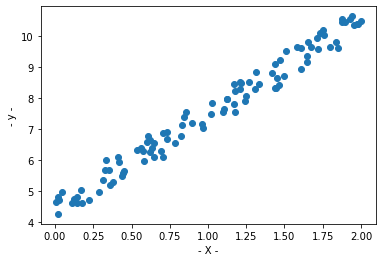

In [7]:
# X ile y arasındaki ilişkiyi görselleştirelim.

plt.scatter(X, y)
plt.xlabel("- X -")
plt.ylabel("- y -")
plt.show()

*Görüldüğü üzere X ile y arasındaki ilişki `lineer`'dir.

**X ile y arasındaki ilişkiyi bildiğimizi farz ederek yukarıdaki işlemleri gerçekleştirdik. Bu ilişkiye dair bilgi sahibi olmamızı sağlayan etken `intercept` ve `coefficient` değerlerininin tarafmızca belirlenmesidir. Böylece X ile y arasındaki ilişkiyi bildiğimiz senaryoyu gözlemleyerek regresyon modelini anımsamış olduk. Şimdi de gerçek X - y ilişkisinin fonksiyonunu yazalım.**

### $$ y = w_0 + w_1X + \epsilon $$

Burada;

* $w_0$ = $\beta_0$
* $w_1$ = $\beta_1$
* $\epsilon$ = Error Rate

* Burada $w_0$ ve $w_1$ değerleri W (weight) adlı bir matris içerisinde tutulup vektör olarak formatlanabilir.
    * W vektörü: $W = [w_0 \ w_1]$

X-y arasındaki ilişkiyi bildiğimiz senaryoyu yeniden ele alalım. Intercept ve coefficient değerlerini regresyon denkleminde yerine koyarsak aşağıdaki sonucu elde ediyorduk:<br> 
### $$y = 4 + 3 * X + np.random.rand(100,1)$$<br>

Buna göre;
#### $$w_0 = 4$$
#### $$w_1 = 3$$
olur.<br>

<br>Vektör kullanarak gösterecek olursak;
### $$y = WX + \epsilon$$
şeklinde bir sonuç elde ederiz.<br>

<br>Burada $W$ ile $X$ vektörlerinin $WX$ şeklinde gösterimi, W ile X'in *vektörel çarpımı*, `Dot Product (İç Çarpım)`'ıdır. Bu vektörel çarpım aslında; 
### $$\hat y = w_0 + w_1*x_1 + w_2*x_2 + ... + w_n*x_n + \epsilon$$
ifadesi ile eşdeğerdir.

* Yukarıda, vektörler ile yeniden yazdığımız denklemi analitik olarak çözümleyebiliriz.

**NOT:** Makine öğrenmesinde vektörler; genellikle tek sütunlu 2-boyutlu diziler şeklinde, sütun vektörü olarak gösterilir. Eğer $W$ ve $X$ sütun vektörleri ise, tahmin $\hat y = W^{T}X$ olur. Bu denklemde $W^{T}$, $W$'nin transpozudur, yani sütun vektörü yerine satır vektörüdür ve $W^{T}X$, $W^{T}$ ile $X$'in matris çarpımıdır. Elbette tahmin aynı tahmindir ancak tek bir fark söz konusudur: tahmin, artık skaler bir değer yerine tek hücreli bir matristir.

### ANALİTİK ÇÖZÜM

$y = WX + \epsilon$ denkleminin analitik çözümünü vektörler üzerinden gerçekleştirmeden önce Lineer Regresyon Yöntemi'ni kullanırken gerçekleştirdiğimiz analitik çözüm üzerinden gidelim. 

Least Squares Method (En Küçük Kareler Yöntemi), birbirine bağlı olarak değişen iki fiziksel büyüklük arasındaki ilişkiyi mümkün olduğunca gerçeğe uygun bir denklem olarak yazmak için kullanılan standart bir regresyon yöntemidir. Bir başka deyişle bu yöntem, ölçüm sonucu elde edilmiş veri noktalarına “mümkün olduğu kadar yakın” geçecek bir işlev eğrisi bulmaya yarar. Gauss-Markov Teoremi’nin en küçük kareler yöntemi, regresyon için optimal yöntemdir.

Bir diğer ifadeyle; Least Squares Method, RSS değerini minimize ederek en iyi $w_0$ ve $w_1$ değerlerini tahmin eder.

Herhangi bir $x_i$ için tahmin denklemi;
### $$ \hat y^{(i)} = \hat w_0 + \hat w_1 x^{(i)} $$

Burada;
* $x^{(i)}$: Veri setindeki $i^{inci}$ örneğin, etiketi(label) hariç tüm niteliklerinin değerlerini içeren bir vektördür.
* $\hat y^{(i)}$: Veri setindeki $i^{inci}$ örneğin etiketi, yani o örnek için istenen çıktı değeri.

<br>Genel olarak:
* **Değişkenler** için (x'in sütunları) alt index **($x_i$)** kullanılır.
* **Veriler** için (satır) üst index **($x^{(i)}$)** kullanılır

Burada **X**'ler, yani girdi değerleri, bilindiğine göre, tahmin etmeye çalıştığımız değişkenler(katsayılar/coefficients), $w_0$ ve $w_1$'dir


**NOT**: Katsayılar(Coefficients) için aşağıdaki gösterimler kullanılabilir:
* $w$
* $\theta$
* $\beta$ 

Bu noktadan itibaren gerçekleştirmek istediğimiz Tahmin için çalışmaya başlayalım.

***

Tahmin işlemini yukarıda bahsettiğimiz **Least Squares Method** ile gerçekleştiririz. Bunun yanında, Least Squares Method'un bir türü olan **Ordinary Least Squares Method**'u kullanacağız. 

<br>Ordinary Least Squares(OLS), Linear Regression modelinde bilinmeyen parametreleri tahmin etmek için kullanılan bir tür lineer Least Squares Method'dur. OLS, açıklayıcı değişkenler kümesinin doğrusal bir fonksiyonunun parametrelerini en küçük kareler ilkesine göre seçer: verilen veri kümesinde gözlemlenen bağımlı değişken (gözlemlenen değişkenin değerleri) ile bağımsız değişkenin doğrusal fonksiyonu tarafından tahmin edilenler arasındaki farkların karelerinin toplamını en aza indirir.

**Hatırlatma**
Herhangi bir **i** noktasındaki hata: $$e^{(i)} = \hat y^{(i)} - y^{(i)}$$
**<br>Herhangi Bir Noktadaki Hata Değeri = O Noktanın Tahmin Edilen Değeri - O Noktanın Gerçek Değeri** 

**e: Residual Error**

**RSS: Residual Sum of Squares**
$$RSS = e^2_1 + e^2_2 + e^2_3 +...+ e^2_n$$

**Özetle, Least Square Method, RSS değerini minimize ederek en iyi $w_0$ ve $w_1$ değerlerini tahmin eder.**

***

### MATEMATİKSEL GÖSTERİM

### $$ \hat w_1 = \frac{\sum_{i=1}^n (x^{(i)} - \overline x)(y^{(i)} - \overline y)}{\sum_{i=1}^n (x^{(i)} - \overline x)^2} $$

### $$ \hat w_0 = \overline y - \hat w_1 \overline x $$

Burada:

### $$ \overline y = \frac{1}{n} \sum_{i=1}^n y^{(i)} $$

### $$ \overline x = \frac{1}{n} \sum_{i=1}^n x^{(i)} $$

Bu noktaya kadar elde ettiğimiz bilgilerden sonra şu ifadeyi ekleyelim: çoğu zaman Analitik Yöntem kullanarak çözüme ulaşmak mümkün olmaz çünkü üzerinde çalıştığımız veriler oldukça fazladır. X, W ve y'nin aslında birer `matris` olduğunu ve X matrisinin çoğu çalışmada yüksek boyutlara sahip olduğunu göz önünde bulundurursak vardığımız bu sonuç daha anlaşılır hale gelecektir. Bununla birlikte Analitik Yöntem kullanırken, W değerlerini bulmak için çok fazla Matrix Çarpımı yapılması gerekir ki bu, bilgisayarların GPU ve CPU donanımlarını ciddi oranda yoran bir işlemdir.

Peki bu problemin üstesinden nasıl geleceğiz ya da nasıl daha etkili bir yöntem bulacağız. Cevap: YAKINSAYARAK.

**Problemin Tanımı**

Toplam Hatayı minimize edecek $w_0$ ve $w_1$ değerlerini yani katsayıları bulmak.

Toplam Hata, $w_0$ ve $w_1$ değişkenlerine bağlı bir Convex Fonksiyonudur. Bunun sebebi, Toplam Hatanın karesel değerlerin toplamı sonucunda bulunmasıdır.

<img src="images/globalminimum.png"/>

### TERİMLER

#### COST FUNCTION (MALİYET FONKSİYONU)

Lineer regresyonda **tahmin edilen y** değeri ile **gerçek y değeri** arasındaki hatayı minimuma indirebilmek için öyle **w değerleri** bulmalıyız ki Maliyet Fonksiyonu minimize edilebilsin. Maliyet Fonksiyonunun basit tanımı, gerçek y değerleri ile tahmin edilen y değerleri arasındaki fark şeklinde ifade edilebilir. Maliyet Fonksiyonu şu notasyonla gösterilir:
### $$ J(w) = \frac{1}{2n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)})^2 $$

Cost Funtion aslında MSE(Mean Square Error)'nin özel bir formudur. Hatırlatmak için:
### $$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2 $$

#### GRADIENT

Cost Function'ın değişkenlere(W değerleri) göre değişim miktarı(Türevi) 

### $$ J(w) = \frac{1}{2n} \sum_{i=1}^n (\hat w_0 + \hat w_1x^{(i)} - y^{(i)})^2 $$

$w_0$'a göre kısmi türev:

### $$ \frac{\partial J(w)}{\partial w_0} = \frac{1}{n} \sum_{i=1}^n (\hat w_0 + \hat w_1x^{(i)} - y^{(i)}) $$

### $$ \frac{\partial J(w)}{\partial w_0} = \frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) $$

$w_1$'e göre kısmi türev:

### $$ \frac{\partial J(w)}{\partial w_1} = \frac{1}{n} \sum_{i=1}^n (\hat w_0 + \hat w_1x^{(i)} - y^{(i)}) x^{(i)} $$

### $$ \frac{\partial J(w)}{\partial w_1} = \frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) x^{(i)} $$

Bu noktada, Cost Function(J)'ın **W** değerlerine göre nasıl değiştiğini, yani türevini, her bir $x^{(i)}$ ve $y^{(i)}$ noktasında bildiğimize göre bunu kullanabiliriz. 

**Bu türeve *Gradient* adı verilir. Kısacası Gradient, J'nin W değerlerine göre nasıl değiştiğini bize söyleyen değişim vektörüdür.**

Gradient'in W vektörü üzerinden genel gösterimi:
### $$ \frac{\partial J(W)}{\partial W_j} = \frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) X_j^{(i)} $$

<img src="images/cost_function.jpeg"/>

### Gradient Descent Nasıl Çalışır?

1. Önce bir başlangıç noktası seçilir, bu nokta herhangi bir nokta olabilir. Seçilen nokta görselde A harfi ile belirtilmiştir. [$w_0$ ve $w_1$]
2. Bu nokta için Cost Function değeri [**J(W)**] hesaplanır.
3. Hesaplanan bu maliyet - J(W) değeri üzerinden $w_0$ ve $w_1$ için **Gradient** hesaplanır. Yani W değiştiğinde J(W) ne kadar değişiyor bilgisine ulaşıyoruz.
4. Bu Gradient'in **negatif** değeri alınır. Çünkü değişim miktarı, yani türev, artış olarak gözlemlenir, ancak biz Cost Function değerini azaltmak istiyoruz. Bu nedenle değişim miktarının negatifini inceliyoruz.
5. Bu negatif değer bir learning rate **$\alpha$** ile çarpılır. Learning Rate bizim tarafımızdan belirlenir.
6. Bu çarpımın sonucu, ilgili $W$ değerinden çıkarlır
7. Döngü 1. adıma geri döner ve belirlenen iteration(döngü) adedince gerekli işlemleri yapmaya devam eder.

### Gradient Descent Akışı

Iterasyonlar kullanarak $W$ değerini güncelleyeceğiz:

### $$ W_j = W_j - \alpha (\frac{1}{n} \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) X_j^{(i)}) $$

Burada;
* **Learning Rate : $\alpha$**
* Gradient : $ \sum_{i=1}^n (\hat y^{(i)} - y^{(i)}) X_j^{(i)}) $

- Yukarıdaki işlemler sonucuna W değeri her iterasyonda yenilenir. Bunun sonucunda, Convex şekilde olan Gradient eğirisinde aşağı doğru ilerleyerek global minimuma ulaşılır.

***

## APPLIED GRADIENT DESCENT WITH PYTHON

* Maliyet (Cost) hesaplayacağımız fonksiyonumuzu yazalım.

In [8]:
# Maliyet Hesaplama Fonksiyonu

def costCalc(W, X, y):
    """
    X ve y için Cost (Maliyet) hesaplar.
    
    Parametreler:
        W = Katsayı Vektörü     -> (p, 1)
        X = Girdi Vektörü       -> (n, p)
        y = Gerçek y Değerleri  -> (n, 1)

    Burada:
        n: Toplam veri adedi (satır sayısı)
        p: X içerisindeki değişken adedi (sütun sayısı)
        
    Geriye Dönüş Değeri:
        cost = Hesaplanan maliyet değeri
    """
    
    # Toplam veri adedini hesapla
    n = len(y)
    
    # Önce tahmin değerini hesapla -> 𝑦̂ = X*W
    # X -> (n, p)
    # W -> (p, 1)
    # 𝑦̂ -> (n, 1)
    prediction = X.dot(W)
    
    # Cost Function değerini hesapla -> "J"
    cost = (1 / 2 * n) * np.sum(np.square(prediction - y))
    
    # Hesaplanan Cost Function değerini geriye dön
    return cost

In [9]:
# Gradient Descent Fonksiyonu

def gradientDescent(X, y, W, learning_rate=0.01, iterations=100):
    """
    Gradient Descent Uygulama Fonksiyonu
    
    Parametreler:
        X = X Matrisi (bias unit eklenmiş hali, yani 1'lerden oluşmuş ilk sütun)
        y = y vektörü
        W = Katsayı vektörü (w'lardan oluşmuş)
        learning_rate = learning rate: alpha (öğrenme katsayısı)
        iterations = toplam döngü sayısı
        
    Geriye Dönüş Değeri:
        * W vektörünün son hali
        * Maliyet Listesi (cost history)
        * W vektörünün listesi (weight history)
    """
    
    n = len(y)
    costHistory = np.zeros(iterations)
    weightHistory = np.zeros((iterations, 2))
    
    for itr in range(iterations):
        
        prediction = np.dot(X, W)
        
        W = W - (1 / n) * learning_rate * (X.T.dot((prediction - y)))
        
        weightHistory[itr, :] = W.T
        
        costHistory[itr] = costCalc(W, X, y)
        
    return W, costHistory, weightHistory

Şimdi de **GradientDescent()** fonksiyonunu kullanarak yukarıda yarattığımız veri seti için en uygun katsayıları bulalım.

Bunun için önce bir $W_0$ başlangıç değeri belirlememiz lazım. Bu başlangıç değeri random bir değer olabilir.

* Gaussian(Normal) Dağılım içerisinden bir rastgele W vektörü alabiliriz. https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

In [10]:
W = np.random.randn(2, 1)
print(W)

[[-0.54422174]
 [ 0.22312941]]


Şimdi bir *Learning Rate($\alpha$)* değeri belirleyelim. Başlangıç için *0.01* değerini uygun bulduk.

In [11]:
learningRate = 0.01

Toplam *iteration* adedini 1000 olarak kabul edelim.

In [12]:
nIter = 1000

Elimizdeki X vektörünün tek sütunluk bir vektör olduğunu hatırlatalım. Bununla birlikte $w_0$ için 1'lerden oluşan bir sütunu (*Bias Column*) sütunların başına eklemek durumundayız.

In [13]:
X

array([[1.16807712],
       [1.75473675],
       [1.26721411],
       [0.82253037],
       [1.33577081],
       [1.83909273],
       [1.98339084],
       [1.99733084],
       [1.17645549],
       [0.68954445],
       [1.12497077],
       [1.01739087],
       [0.57964994],
       [1.30724457],
       [1.46231769],
       [0.96476632],
       [1.9441039 ],
       [0.22104977],
       [1.24099918],
       [1.73326162],
       [1.89703354],
       [1.12214929],
       [1.51302582],
       [0.35034928],
       [0.53294549],
       [0.02192082],
       [1.60518398],
       [1.72026992],
       [0.41619115],
       [0.6239735 ],
       [0.57714573],
       [0.04410495],
       [0.72901039],
       [1.46812195],
       [1.20671413],
       [1.09778705],
       [0.16906083],
       [0.33104458],
       [1.58346874],
       [0.12081886],
       [1.92779216],
       [1.4211196 ],
       [1.02374505],
       [0.56478013],
       [1.67100687],
       [1.95206583],
       [1.64949227],
       [1.435

In [14]:
n = len(X)

X_b = np.c_[np.ones((n, 1)), X]

print(X_b)

[[1.         1.16807712]
 [1.         1.75473675]
 [1.         1.26721411]
 [1.         0.82253037]
 [1.         1.33577081]
 [1.         1.83909273]
 [1.         1.98339084]
 [1.         1.99733084]
 [1.         1.17645549]
 [1.         0.68954445]
 [1.         1.12497077]
 [1.         1.01739087]
 [1.         0.57964994]
 [1.         1.30724457]
 [1.         1.46231769]
 [1.         0.96476632]
 [1.         1.9441039 ]
 [1.         0.22104977]
 [1.         1.24099918]
 [1.         1.73326162]
 [1.         1.89703354]
 [1.         1.12214929]
 [1.         1.51302582]
 [1.         0.35034928]
 [1.         0.53294549]
 [1.         0.02192082]
 [1.         1.60518398]
 [1.         1.72026992]
 [1.         0.41619115]
 [1.         0.6239735 ]
 [1.         0.57714573]
 [1.         0.04410495]
 [1.         0.72901039]
 [1.         1.46812195]
 [1.         1.20671413]
 [1.         1.09778705]
 [1.         0.16906083]
 [1.         0.33104458]
 [1.         1.58346874]
 [1.         0.12081886]


Bu noktada *gradientDescent* fonksiyonunu çağırabiliriz.

In [15]:
finalW, costHistory, weightHistory = gradientDescent(X_b, y, W, learningRate, nIter)

In [16]:
print("W-Final: ", finalW)

W-Final:  [[4.11334284]
 [3.34638016]]


In [17]:
print("Cost History:", costHistory)

Cost History: [310956.69911467 297428.42222382 284494.66581116 272129.28628768
 260307.2897608  249004.78147488 238198.9174752  227867.85839754
 217990.72528993 208547.55737719 199519.27168291 190887.62442699
 182635.17412087 174745.24628562 167201.89972172 159989.89426202
 153094.65994294 146502.26753133 140199.40034748 134173.32732725
 128411.87726883 122903.41421202 117636.81390029 112601.44127787
 107787.12897652 103184.1567483   98783.2318029   94575.47000956
  90552.37792574  86705.83561608  83028.08022691  79511.69028311
  76149.57067551  72934.93830853  69861.30837894  66922.48125808
  64112.5299509   61425.78810657  58856.83855623  56400.50235498
  54051.82830558  51806.08294296  49658.74095921  47605.47604952
  45642.15216081  43764.81512512  41969.68466102  40253.14672666
  38611.7462092   37042.17993572  35541.2899914   34106.05733168
  32733.5956752   31421.14566539  30166.0692888   28965.84453884
  27818.06031428  26720.41154201  25670.69451432  24666.80243124
  23706.721

In [18]:
print("Initial Cost:", costHistory[0])
print("Final Cost:", costHistory[-1])

Initial Cost: 310956.6991146724
Final Cost: 541.2671614304561


In [19]:
W_0 = W[0]
print("W_0:", W_0)

finalW_0 = finalW[0]
print("Final W_0:", finalW_0)

W_0: [-0.54422174]
Final W_0: [4.11334284]


In [20]:
W_1 = W[1]
print("W_1:", W_1)

finalW_1 = finalW[1]
print("Final W_1:", finalW_1)

W_1: [0.22312941]
Final W_1: [3.34638016]


Gerçek katsayıları hatırlayalım;
* $w_0$ = 4
* $w_1$ = 3

*Gradient Descent* ile bulduğumuz katsayılar;

In [22]:
print("𝑤̂_0:", finalW_0)
print("𝑤̂_1:", finalW_1)

𝑤̂_0: [4.11334284]
𝑤̂_1: [3.34638016]


* Görüldüğü üzere gerçek değerler ve Gradient Descent ile elde edilen değerler birbirlerine oldukça yakın.

***

### LEARNING RATE

* Şimdi de maliyet değerinin her iterasyonda nasıl değiştiğini inceleyelim.

In [24]:
# Maliyet değişimi görselleştiren fonksiyon

def costVsIterations(costHistory, nIter):
    
    fig, ax = plt.subplots(figsize=(12,8))
    
    plt.plot(range(nIter), costHistory)
    
    plt.xlabel("Iterations")
    plt.ylabel("Cost - J(W)")
    plt.title("MALİYET - ITERASYON")
    plt.grid()
    plt.show()

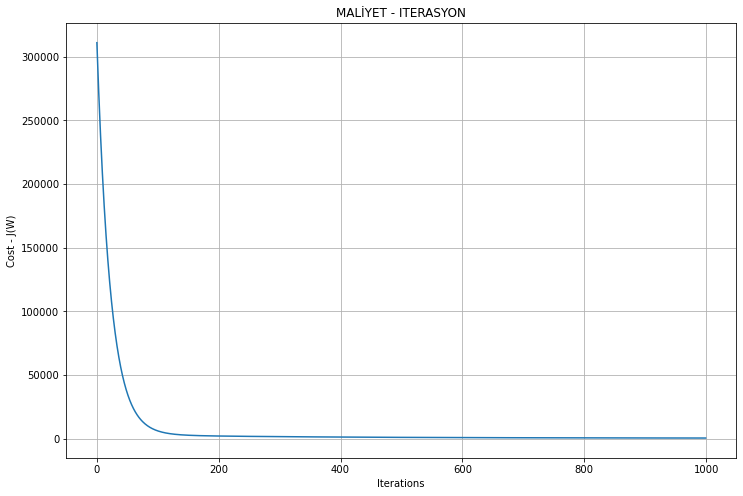

In [25]:
costVsIterations(costHistory, nIter)

Grafiğe göre, *iterasyon sayısı arttıkça*;
* Öncelikle, *Cost* değeri çok hızlı bir şekilde azalıyor.
* Belli bir iterasyon sayısından sonra (yaklaşık 180. iterasyon) *Cost* değerinin azalama ivmesi oldukça düşüyor.

**DİKKAT: Yukarıda elde ettiğimiz sonucu Learning Rate($\alpha$) = 0.01 için elde ettik.** 

In [26]:
def callGradient(learningRate, nIter):
    
    # Belirtilen learningRate ve nIter için maliyet değerlerini al
    finalW, costHistory, weightHistory = gradientDescent(X_b, y, W, learningRate, nIter)
    
    # Bu maliyet değerlerine göre grafik çizimi yap
    costVsIterations(costHistory, nIter)

**DENEY - 1**: *Learning Rate($\alpha$)* = 0.01 olacak şekilde aynı kalsın ancak *İterasyon* sayısını 1000'den 2000'e çıkaralım.

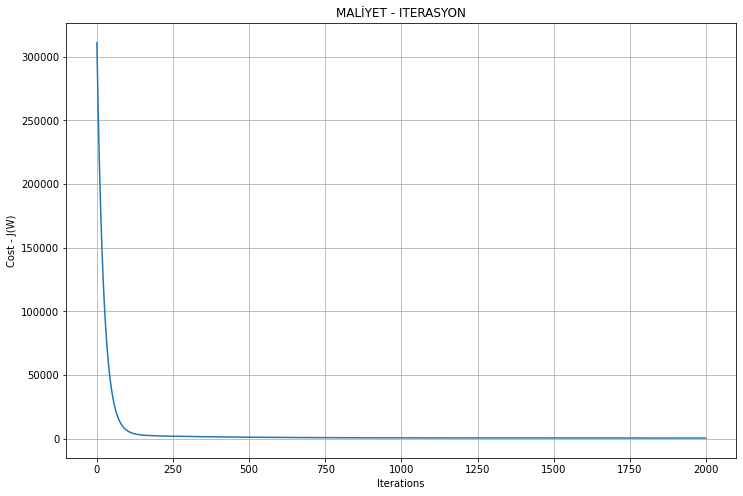

In [27]:
# learningRate = 0.01
# nIter = 2000

learningRate = 0.01
nIter = 2000
callGradient(learningRate, nIter)

**Sonuç**: Görüldüğü üzere bir önceki çalışmaya göre hiçbir değişiklik gerçekleşmedi çünkü zaten 180. iterasyon civarında en iyi değer bulunmuş oluyordu.

**DENEY - 2**: *Learning Rate($\alpha$)* = 0.01 olacak şekilde aynı kalsın ancak *İterasyon* sayısını 1000'den 500'e düşürelim.

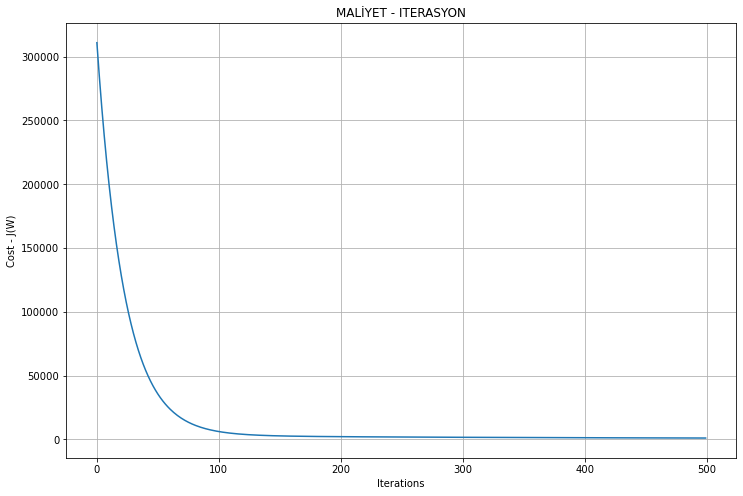

In [28]:
# learningRate = 0.01
# nIter = 500

learningRate = 0.01
nIter = 500
callGradient(learningRate, nIter)

**Sonuç**: Görüldüğü üzere bir önceki çalışmaya göre hiçbir değişiklik gerçekleşmedi çünkü zaten 180. iterasyon civarında en iyi değer bulunmuş oluyordu.

**DENEY - 3**: *Learning Rate($\alpha$)* = 0.05 olacak şekilde arttırılsın ancak *İterasyon* sayısı 1000 olacak şekilde aynı kalsın.

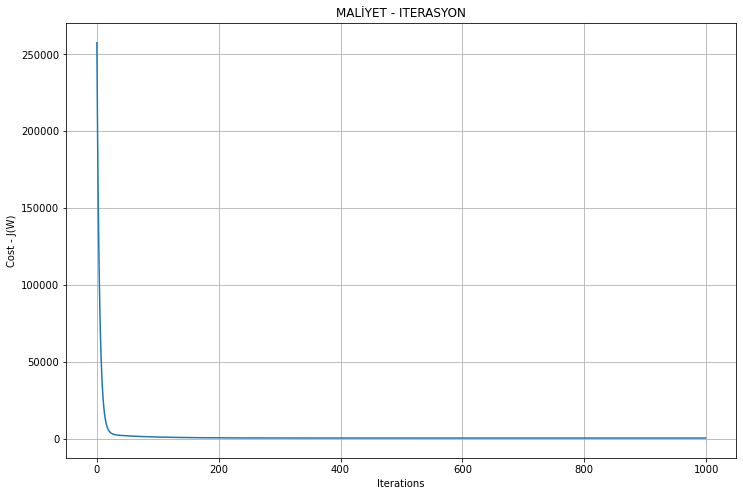

In [29]:
# learningRate = 0.05
# nIter = 1000

learningRate = 0.05
nIter = 1000
callGradient(learningRate, nIter)

**Sonuç**: Görüldüğü üzere bu senaryoda optimum değere çok hızlı bir şekilde ulaşıldı ki bu takribi 40. *iterasyona* denk düşüyor.

O halde, *Learning Rate* değerini adım büyüklüğü olarak düşünebilir ve adımlar ne kadar büyük olursa optimum sonuca o kadar çabuk ulaşırız diyebiliriz.

**ACABA DİYEBİLİR MİYİZ?**

**Deney - 4**: *İterasyon* sayısı 1000 olacak şekilde aynı kalsın ancak *Learning Rate($\alpha$)* değerini **0.1** olacak şekilde ayarlayalım. 

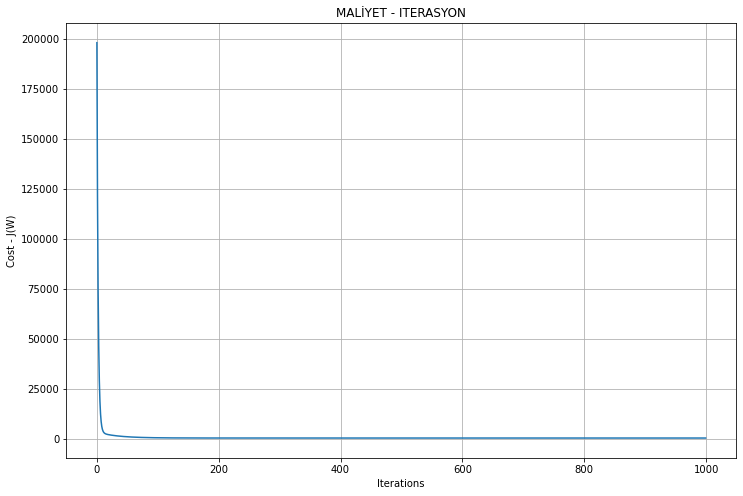

In [31]:
# learningRate = 0.1
# nIter = 1000

learningRate = 0.1
nIter = 1000
callGradient(learningRate, nIter)

**Sonuç**: Görüldüğü üzere, *Learning Rate($\alpha$)* değerini biraz daha arttırınca optimum sonuca daha hızlı ulaştık ki bu da takribi 20. iterasyona denk düşüyor.

**Peki *Learning Rate($\alpha$)* değerini biraz daha arttırırsak yine hızlı bir şekilde optimum sonuca ulaşabilir miyiz? Deneyelim :)**

**Deney - 5**: *İterasyon* sayısı 1000 olacak şekilde aynı kalsın ancak *Learning Rate($\alpha$)* değerini **1.0** olacak şekilde ayarlayalım. 

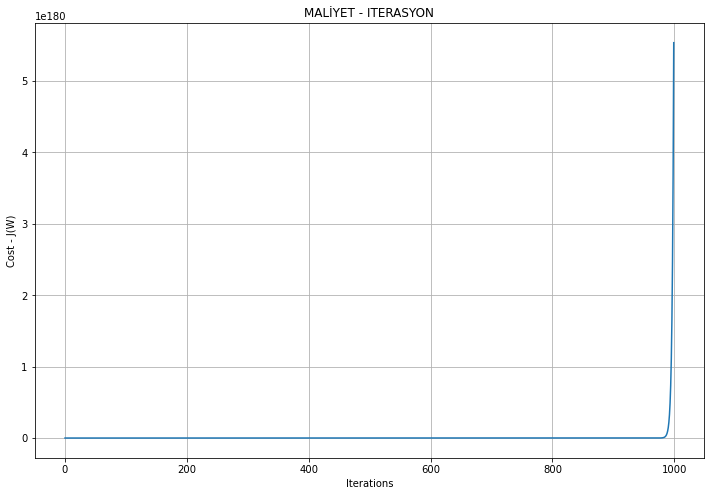

In [33]:
# learningRate = 1
# nIter = 1000

learningRate = 1
nIter = 1000
callGradient(learningRate, nIter)

**Sonuç**: Görüldüğü üzere bu noktada bırakın en iyi değeri bulayı, maliyet değeri belli bir noktadan itibaren çok hızlı bir şekilde arttı.

**Peki neden böyle bir sonuç aldık?** Çünkü *Overshoot* yaptık yani çok büyük boyutlu bir *Learning Rate($\alpha$)* belirleyerek ulaşmayı planladığımız en iyi noktayı atladık, çünkü adım büyüklüğümüz çok fazlaydı.

<img src='images/overshoot.jpg' />